## Step 1 : Understand The Business Problem  And Load The Dataset

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments.
Finding the potential customers by analysing the behaviour of them is useful to understand the targeted customers.    
For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyse which customer segment is most likely to buy the product and then market the product only on that particular segment.



**Column Details:**
* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise
Products
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years
Promotion
* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
Place
* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month


### Load Dataset

In [55]:
import pandas as pd
import numpy as np
import datetime
from datetime import date
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

S = "\033[1m" + '\033[96m' # Used for colored strings
E = "\033[0m"

palette = ["#003672", "#943400", "#ED8B75", "#F2DC5D", "#0E9594"]

In [56]:
data=pd.read_excel('/content/marketing_campaign.xlsx')

In [57]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


## Step 2 : EDA (Exploratory Data Analysis)

In [58]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [59]:
data.shape

(2240, 29)

In [60]:
data.info()    # there are some null values in the Income column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [61]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
ID,2240.0,5592.159821,0.0,2828.25,5458.5,8427.75,11191.0,3246.662198
Year_Birth,2240.0,1968.805804,1893.0,1959.0,1970.0,1977.0,1996.0,11.984069
Income,2216.0,52247.251354,1730.0,35303.0,51381.5,68522.0,666666.0,25173.076661
Kidhome,2240.0,0.444196,0.0,0.0,0.0,1.0,2.0,0.538398
Teenhome,2240.0,0.50625,0.0,0.0,0.0,1.0,2.0,0.544538
Dt_Customer,2240,2013-07-10 10:01:42.857142784,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 12:00:00,2013-12-30 06:00:00,2014-06-29 00:00:00,NaN
Recency,2240.0,49.109375,0.0,24.0,49.0,74.0,99.0,28.962453
MntWines,2240.0,303.935714,0.0,23.75,173.5,504.25,1493.0,336.597393
MntFruits,2240.0,26.302232,0.0,1.0,8.0,33.0,199.0,39.773434
MntMeatProducts,2240.0,166.95,0.0,16.0,67.0,232.0,1725.0,225.715373


In [62]:
print(data.Income.isnull().sum())      #24 null values are present

24


In [63]:
data['Income']=data['Income'].fillna(data['Income'].mean())    # we will fill null values using mean o Income columns
data.Income

,Income
0,58138.0
1,46344.0
2,71613.0
3,26646.0
4,58293.0
...,...
2235,61223.0
2236,64014.0
2237,56981.0
2238,69245.0


In [64]:
print(data.Income.isnull().sum())    # now we can see there is no null value present

0


In [65]:
print(data.duplicated().sum())       #NO duplicate values in our dataset

0


## Step 3 : Visualization

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [68]:
plt.style.use("seaborn-v0_8-dark")

In [69]:
%matplotlib inline

### Bi-variant analysis

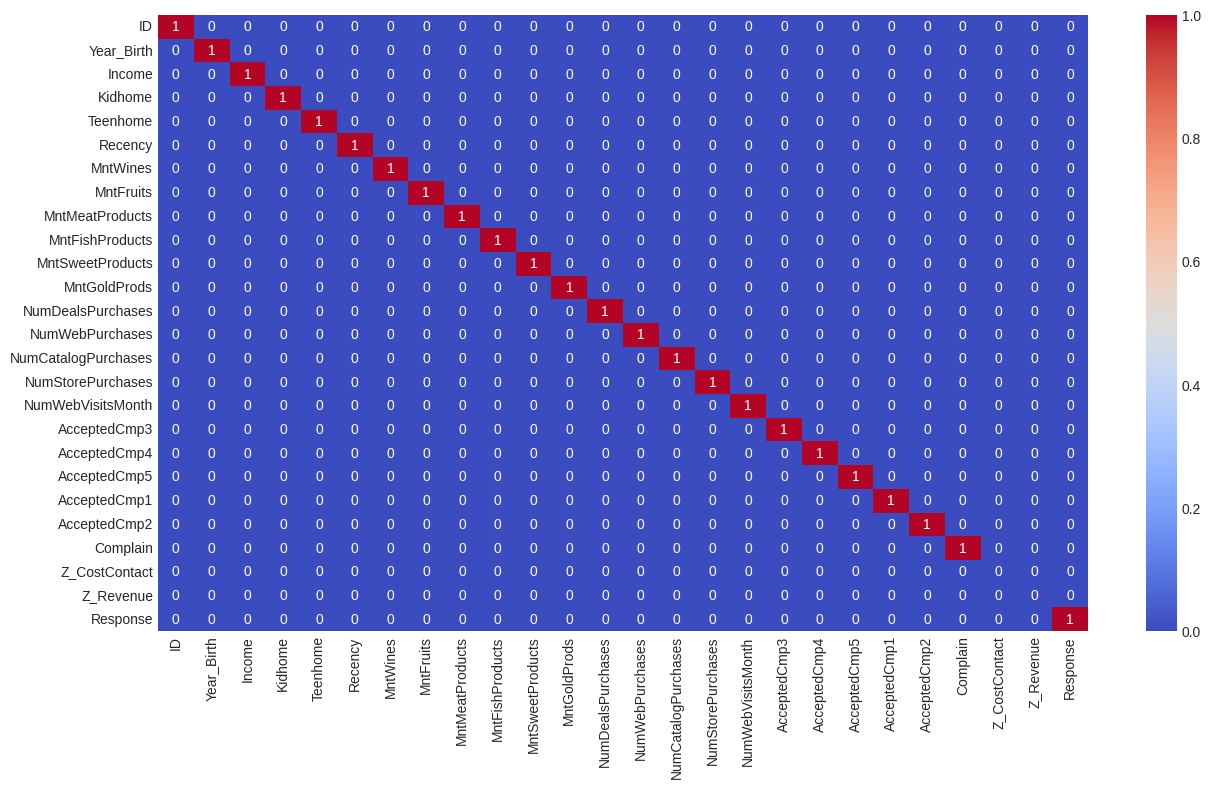

In [70]:
plt.figure(figsize = (15,8))
sns.heatmap(data = data.corr(numeric_only=True)>0.8, annot = True, cmap = 'coolwarm')
plt.show()

#### Interface
Here we can see there are some columns are highly correlated eith each others like 'MntMeatProducts and NumCatalogPurchases'
& 'MntWines and NumStorePurchases'  etc. so here we can say  amount of meat products is purchase by  catalogs  and Amount of wines purchases by stores.

### Histogram

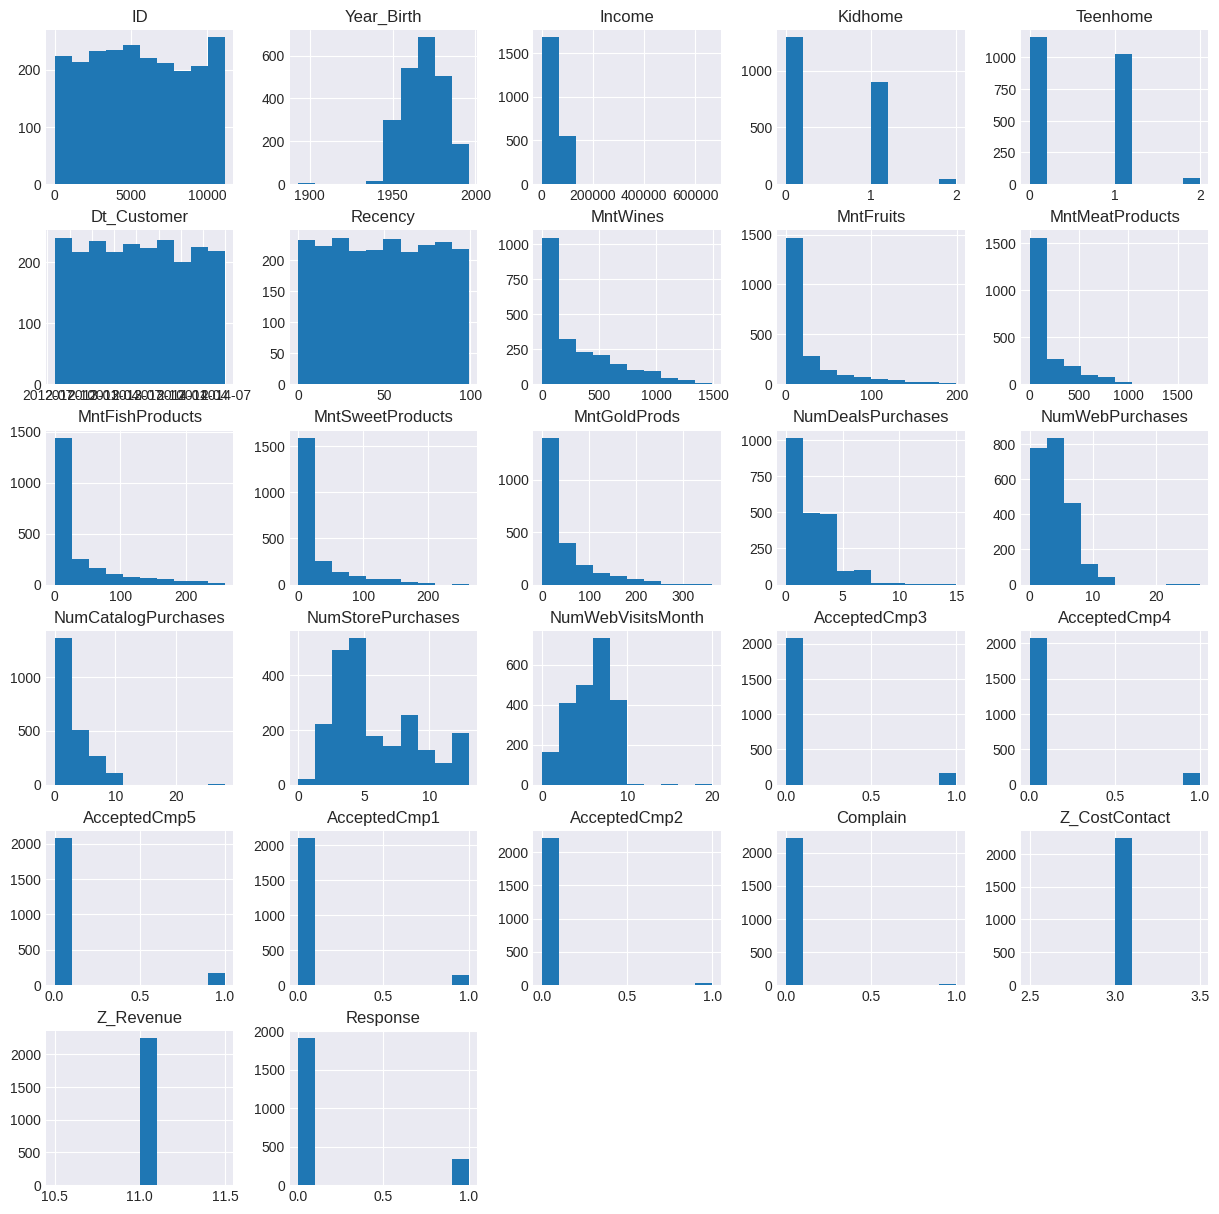

In [71]:
data.hist(figsize=(15,15));

In [72]:
# Let's separate categorical and numerical column
col = data.dtypes == 'object'
obj_cols = (col[col] == True).index
print("Categorical Columns: ",obj_cols.values)

col = data.dtypes != 'object'
num_cols = (col[col] == True).index
print("Numerical Columns: ",num_cols.values)

Categorical Columns:  ['Education' 'Marital_Status']
Numerical Columns:  ['ID' 'Year_Birth' 'Income' 'Kidhome' 'Teenhome' 'Dt_Customer' 'Recency'
 'MntWines' 'MntFruits' 'MntMeatProducts' 'MntFishProducts'
 'MntSweetProducts' 'MntGoldProds' 'NumDealsPurchases' 'NumWebPurchases'
 'NumCatalogPurchases' 'NumStorePurchases' 'NumWebVisitsMonth'
 'AcceptedCmp3' 'AcceptedCmp4' 'AcceptedCmp5' 'AcceptedCmp1'
 'AcceptedCmp2' 'Complain' 'Z_CostContact' 'Z_Revenue' 'Response']


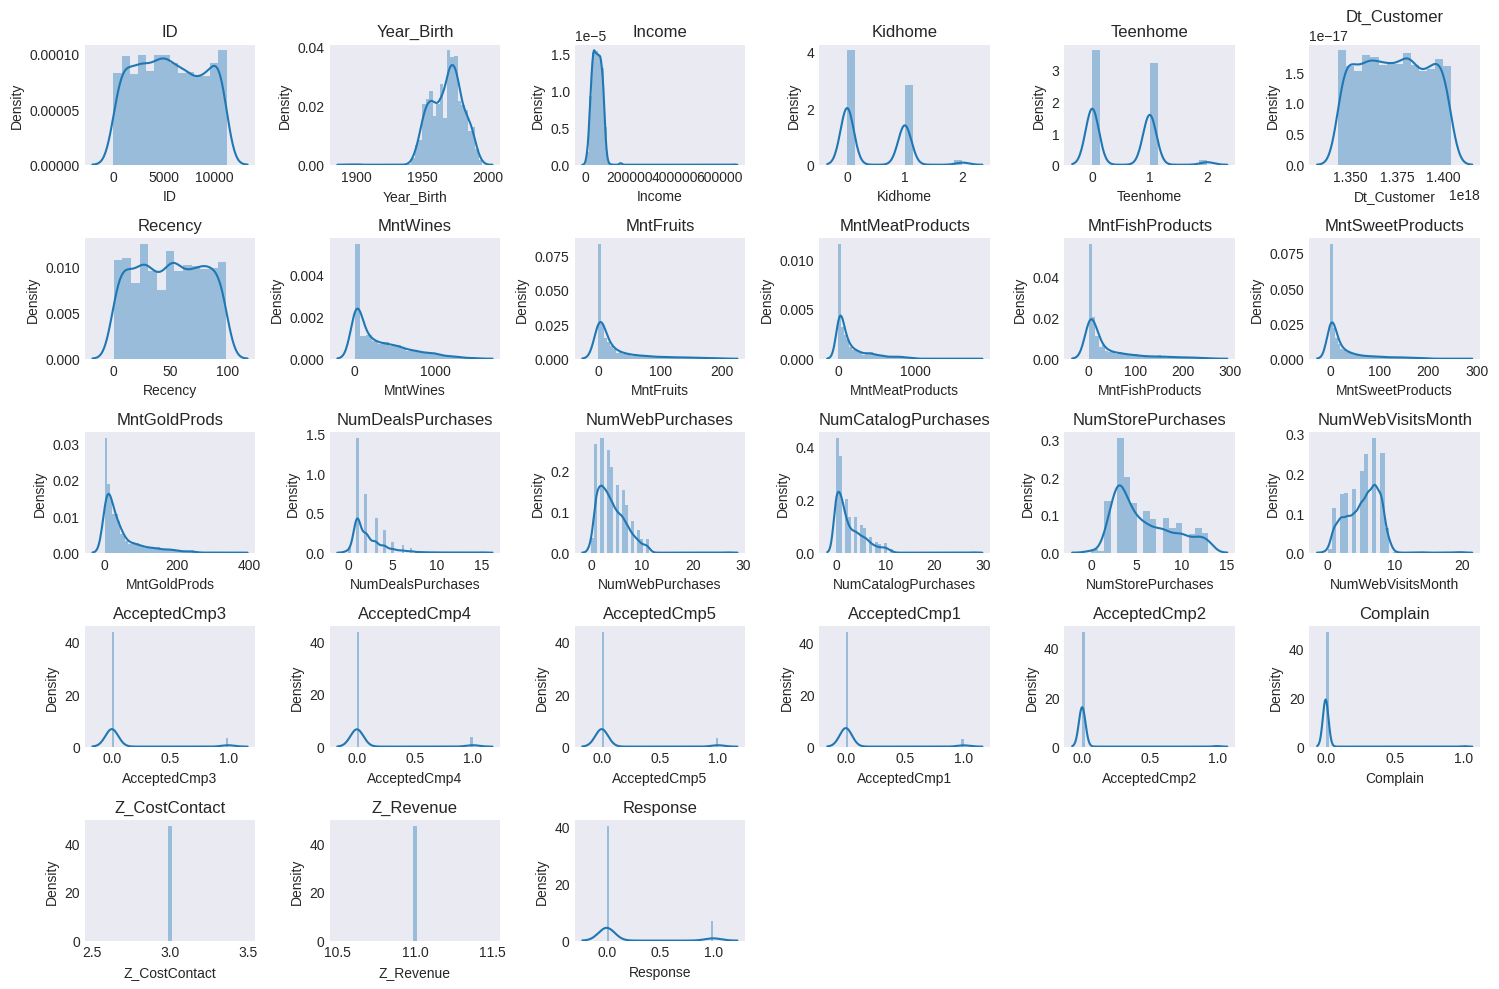

In [73]:
plt.figure(figsize=(15, 10))
index = 0
for col in num_cols:
    index += 1
    plt.subplot(5, 6, index)
    sns.distplot(data[col])
    plt.title(col)
    plt.tight_layout()
plt.show()

In [74]:
import datetime
data["Age"] = 2022 - data["Year_Birth"]

data["Money_Spent"] = (data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"])

data["Children"] = data["Kidhome"] + data["Teenhome"]
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

data["Marital_Status"] = data["Marital_Status"].replace({"Married": "Together", "Alone": "Single", "Absurd": "Single", "Divorced": "Single", "Widow": "Single", "Divorced": "Single", "YOLO": "Single"})



In [75]:
from datetime import date, datetime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
data['Day_Joined'] = data['Dt_Customer'].dt.day_name()
data['Day_Joined']

,Day_Joined
0,Tuesday
1,Saturday
2,Wednesday
3,Monday
4,Sunday
...,...
2235,Thursday
2236,Tuesday
2237,Saturday
2238,Friday


In [76]:
data["Dt_Customer"].dt.year.min(), data["Dt_Customer"].dt.year.max()


(2012, 2014)

In [77]:
data.drop(['ID', 'Year_Birth','Kidhome',
       'Teenhome', 'Dt_Customer','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [78]:
unique_number = []
for i in data.columns:
    x = data[i].value_counts().count()
    unique_number.append(x)

pd.DataFrame(unique_number, index = data.columns, columns = ["Total Unique Values"])

,Total Unique Values
Education,3
Marital_Status,2
Income,1975
Recency,100
MntWines,776
MntFruits,158
MntMeatProducts,558
MntFishProducts,182
MntSweetProducts,177
MntGoldProds,213


### Scatter Plot

As expected, the more the person earns, the more they spend. How about the case where you have children ?





<Axes: xlabel='Age', ylabel='Money_Spent'>

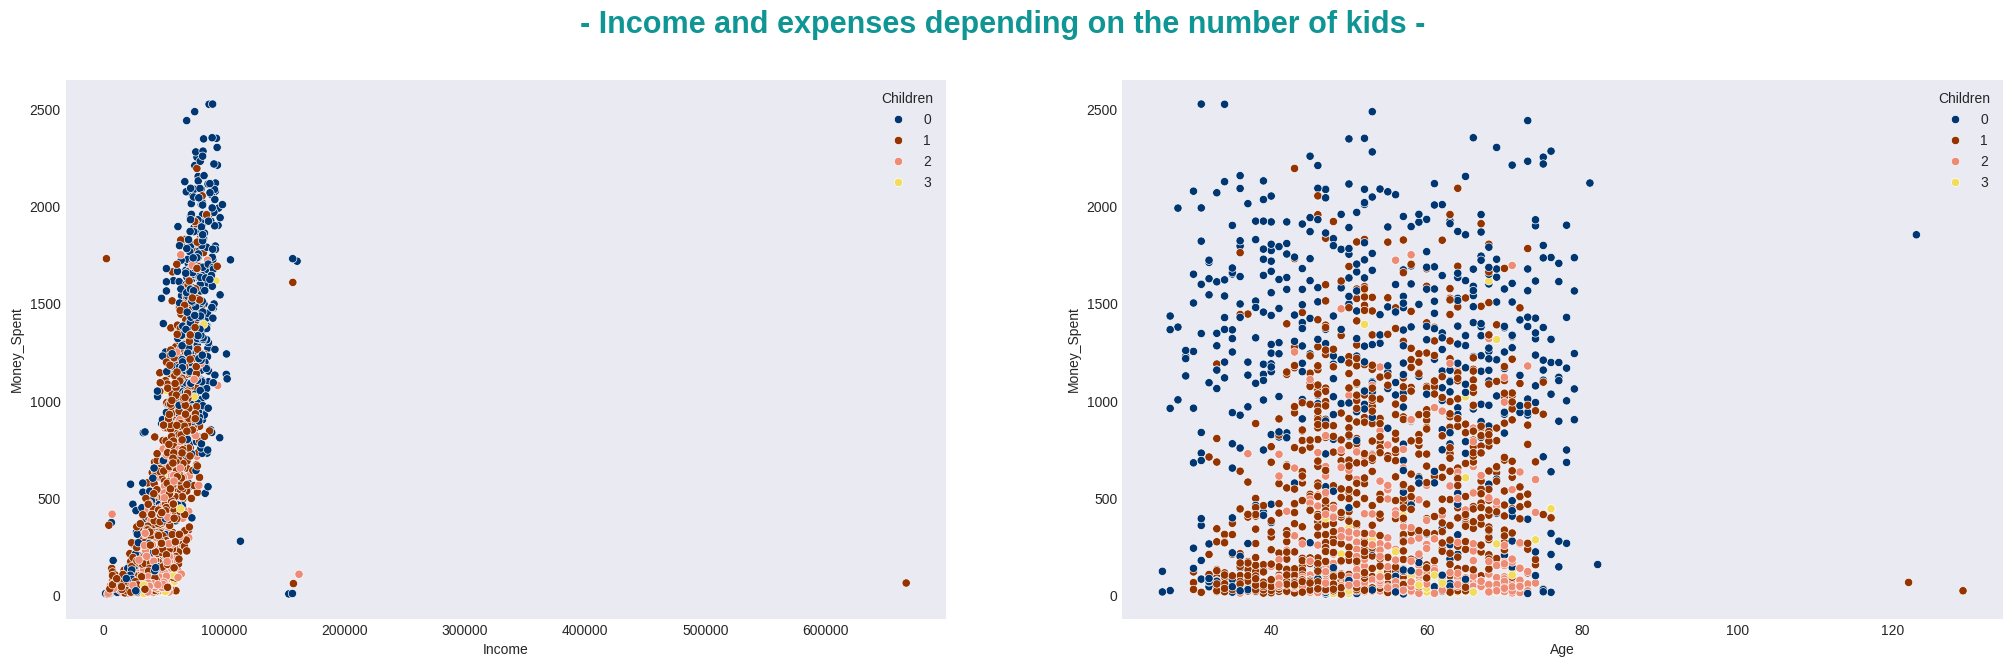

In [79]:
print(S+"As expected, the more the person earns, the more they spend. How about the case where you have children ?\n\n\n")

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(25,7))
fig.suptitle("- Income and expenses depending on the number of kids -",size=22,weight="bold", color=palette[4])


sns.scatterplot(x="Income",y="Money_Spent",data=data, hue="Children", palette=palette[:4], ax=ax1)

sns.scatterplot(x="Age",y="Money_Spent",data=data, hue="Children", palette=palette[:4], ax=ax2)


#### Interface
Using this scatter plot we can see
1. If customer having high salary they are spending more
2. Maximum customers Age is in between 40 to 70 whose spending more

### Box Plot

<Axes: xlabel='Response', ylabel='Money_Spent'>

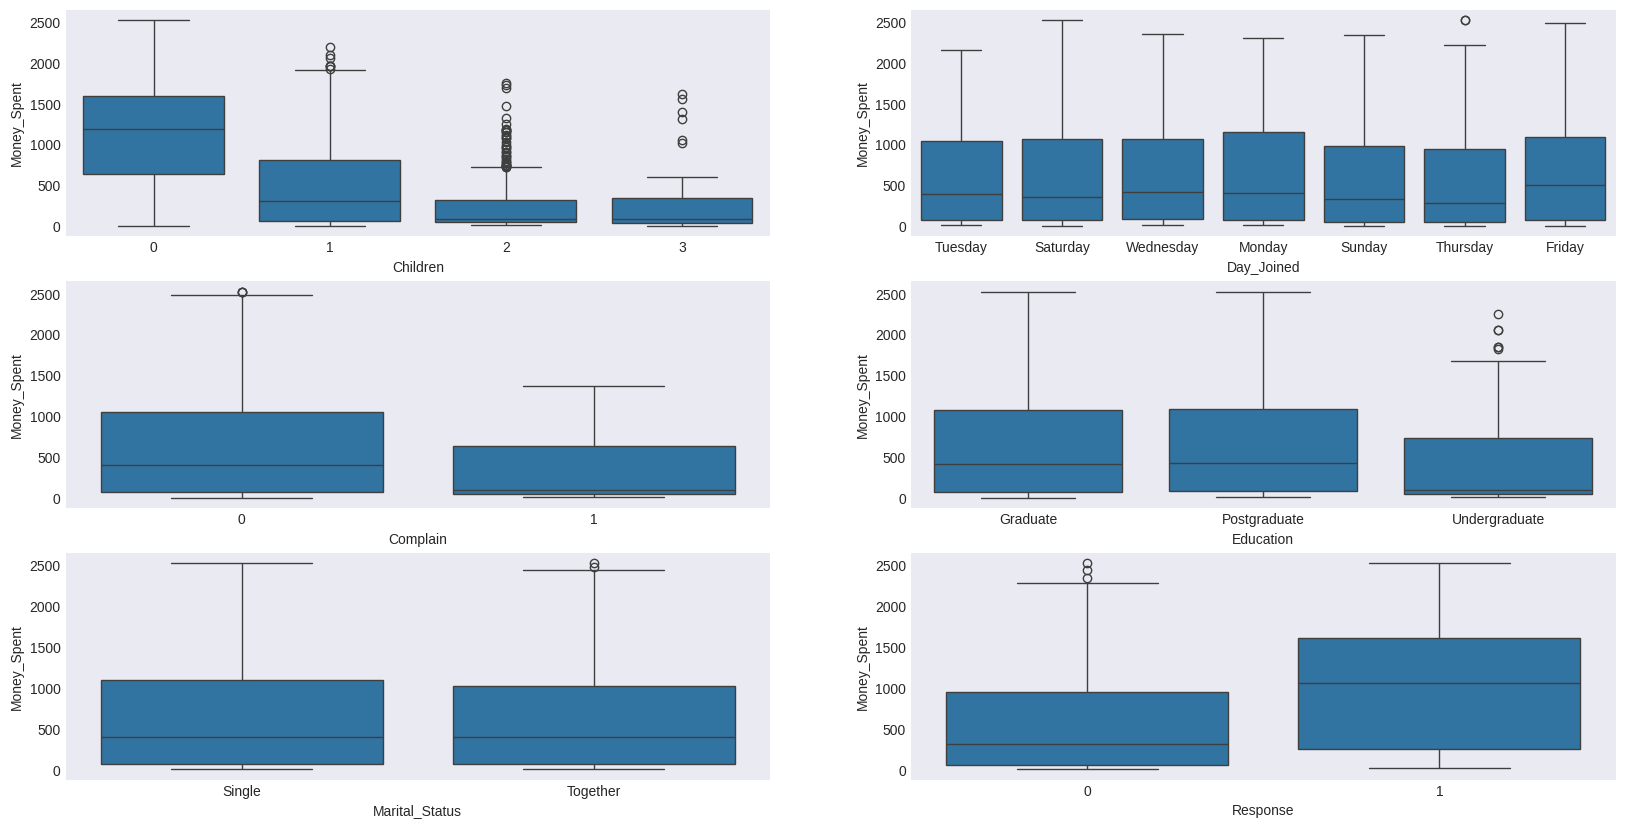

In [80]:
plt.figure(figsize=(20,10))
plt.subplot(3,2,1)
ax = sns.boxplot(x="Children", y="Money_Spent", data=data)

plt.subplot(3,2,2)
ax = sns.boxplot(x="Day_Joined", y="Money_Spent" ,data=data)

plt.subplot(3,2,3)
sns.boxplot(x="Complain",y="Money_Spent",data=data)

plt.subplot(3,2,4)
sns.boxplot(x="Education",y="Money_Spent",data=data)

plt.subplot(3,2,5)
sns.boxplot(x="Marital_Status",y="Money_Spent",data=data)

plt.subplot(3,2,6)
sns.boxplot(x="Response",y="Money_Spent",data=data)


#### Interface
1. In above boxplot we can see those customer are spending more who have 0 child
2. On Friday,Saturday and Monday customer's spending more money
3. Those customer's spending more have less complaints
4. Undergraduated people are spending less
5. Single customer's spent more money
6. Customer's is interested in ofers ad also spent more.

### Pie Chart

In [81]:
data.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Money_Spent,Children,Day_Joined
0,Graduate,Single,58138.0,58,635,88,546,172,88,88,...,8,10,4,7,0,1,65,1617,0,Tuesday
1,Graduate,Single,46344.0,38,11,1,6,2,1,6,...,1,1,2,5,0,0,68,27,2,Saturday
2,Graduate,Together,71613.0,26,426,49,127,111,21,42,...,8,2,10,4,0,0,57,776,0,Wednesday
3,Graduate,Together,26646.0,26,11,4,20,10,3,5,...,2,0,4,6,0,0,38,53,1,Monday
4,Postgraduate,Together,58293.0,94,173,43,118,46,27,15,...,5,3,6,5,0,0,41,422,1,Sunday


In [82]:
# import plotly.express as px #for visualization

# target_instance = data["Response"].value_counts().to_frame()
# target_instance = target_instance.reset_index()
# target_instance = target_instance.rename(columns={'index': 'Category'})
# fig = px.pie(target_instance, values='Response', names='Category', color_discrete_sequence=["green", "red"],
#              title="Customer's Response",width=800, height=400)

# fig.show()
# import plotly.express as px #for visualization

# target_instance = data["Education"].value_counts().to_frame()
# target_instance = target_instance.reset_index()
# target_instance = target_instance.rename(columns={'index': 'Category'})
# fig = px.pie(target_instance, values='Education', names='Category', color_discrete_sequence=["green", "red"],
#              title="Customer's Education ",width=800, height=400)

# fig.show()

# import plotly.express as px #for visualization

# target_instance = data["Marital_Status"].value_counts().to_frame()
# target_instance = target_instance.reset_index()
# target_instance = target_instance.rename(columns={'index': 'Category'})
# fig = px.pie(target_instance, values='Marital_Status', names='Category', color_discrete_sequence=["green", "red"],
#              title="Customer's marital status",width=800, height=400)

# fig.show()
# import plotly.express as px #for visualization

# target_instance = data["Day_Joined"].value_counts().to_frame()
# target_instance = target_instance.reset_index()
# target_instance = target_instance.rename(columns={'index': 'Category'})
# fig = px.pie(target_instance, values='Day_Joined', names='Category', color_discrete_sequence=["green", "red"],
#              title="Customer's Joining Day",width=800, height=400)

# fig.show()


#### Interface
1. Maximum customer are intersted in offers ther gave response
2. Highest number of customer's are Grduated
3. Highest number of customer's are Together
4. Maximum customer are joined on sunday.

### CountPlot

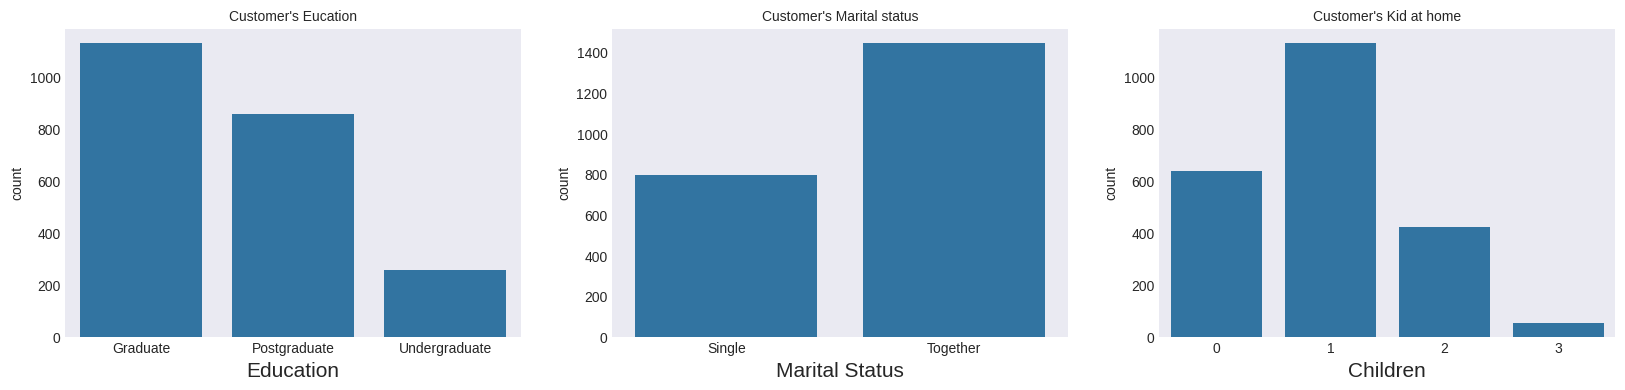

In [83]:
plt.figure(figsize = (20,4))
plt.subplot(1,3,1)
sns.countplot(data=data, x='Education')
plt.xlabel('Education',fontsize= 15)
plt.title("Customer's Eucation",fontsize=10)

plt.subplot(1,3,2)
sns.countplot(data=data, x='Marital_Status')
plt.xlabel('Marital Status',fontsize= 15)
plt.title("Customer's Marital status",fontsize=10)

plt.subplot(1,3,3)
sns.countplot(data=data, x='Children')
plt.xlabel('Children',fontsize= 15)
plt.title("Customer's Kid at home",fontsize=10)


plt.show()           # Here we plotted 0's and 1's columns , 1=yes and  0=no


#### Interface
1. We have highest number of Graduated customer's
2. We have highest number of Together customer's
3. Maximum customer's have 1 childern

### Detecting And Removing Outliers

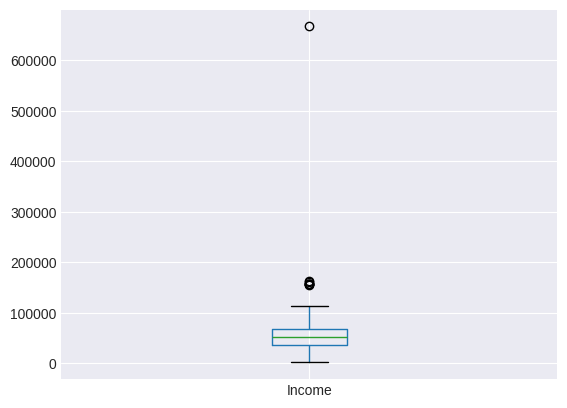

In [84]:
data.boxplot(column='Income')
plt.show()

In [85]:
num_col = [col for col in data.columns if type(col) != 'object']

In [86]:
num_col_sel = ['Age',
 'Income',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']

In [87]:
from collections import Counter

def detect_outliers(data,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []

    for col in features:
        Q1 = np.percentile(data[col], 25)
        Q3 = np.percentile(data[col],75)
        IQR = Q3 - Q1

        outlier_step = 1.5 * IQR
        outlier_list_col = data[(data[col] < Q1 - outlier_step) | (data[col] > Q3 + outlier_step )].index

        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )

    return multiple_outliers

In [88]:
print('Before removing outliers: ',data.shape)
Outliers_to_drop=detect_outliers(data,0,num_col_sel)
data = data.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)
print('Before removing outliers: ',data.shape)


Before removing outliers:  (2240, 21)
Before removing outliers:  (1534, 21)


<Axes: >

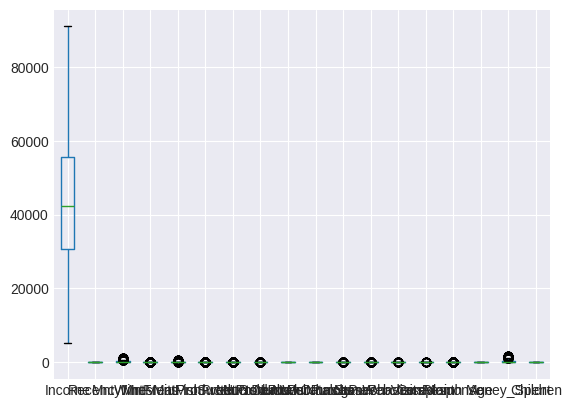

In [89]:
# data.boxplot(column='Recency')
data.boxplot()

### Covert Categorical columns to Numerical columns

In [90]:
object_cols = (data.dtypes == 'object')
objects = list(object_cols[object_cols].index)
objects

['Education', 'Marital_Status', 'Day_Joined']

In [91]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for obj in objects:
    data[obj] = data[[obj]].apply(le.fit_transform)

In [92]:
data.dtypes

,0
Education,int64
Marital_Status,int64
Income,float64
Recency,int64
MntWines,int64
MntFruits,int64
MntMeatProducts,int64
MntFishProducts,int64
MntSweetProducts,int64
MntGoldProds,int64


### Scaling

In [93]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(data)
scaled = pd.DataFrame(ss.transform(data),columns= data.columns )
scaled.head()


,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Money_Spent,Children,Day_Joined
0,-0.946857,-1.366488,0.161850,-0.380491,-0.669048,-0.597433,-0.638199,-0.565224,-0.601554,-0.701628,...,-0.970487,-0.257826,-1.002853,-0.472027,-0.099373,-0.340053,1.359296,-0.762146,1.265740,-0.490608
1,-0.946857,0.731803,1.637051,-0.793322,0.888614,2.452145,0.561382,4.111578,0.668536,0.702289,...,1.896388,0.255151,1.869263,-0.981950,-0.099373,-0.340053,0.387729,1.188360,-1.643091,1.500378
2,-0.946857,0.731803,-0.988116,-0.793322,-0.669048,-0.406834,-0.499404,-0.221972,-0.474545,-0.740625,...,-0.560934,-0.770802,-0.284824,0.037895,-0.099373,-0.340053,-1.290433,-0.694438,-0.188676,-0.988355
3,0.511455,0.731803,0.859431,1.546052,-0.060996,2.070948,0.472157,1.322659,1.049564,-0.350649,...,0.667727,0.768127,0.433205,-0.472027,-0.099373,-0.340053,-1.025460,0.266492,-0.188676,0.007138
4,0.511455,0.731803,1.105794,-1.137347,1.241434,2.007415,0.273879,-0.651037,2.002132,-0.389646,...,1.077281,1.281103,1.869263,0.037895,-0.099373,-0.340053,0.211080,1.032111,-0.188676,-0.988355


# Step 4.Model Building

## K-Means Algorithm

In [94]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data)
y_predicted

array([2, 1, 0, ..., 1, 1, 2], dtype=int32)

In [95]:
data['cluster']=y_predicted
data.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Money_Spent,Children,Day_Joined,cluster
0,0,0,46344.0,38,11,1,6,2,1,6,...,1,2,5,0,0,68,27,2,2,2
1,0,1,71613.0,26,426,49,127,111,21,42,...,2,10,4,0,0,57,776,0,6,1
2,0,1,26646.0,26,11,4,20,10,3,5,...,0,4,6,0,0,38,53,1,1,0
3,1,1,58293.0,94,173,43,118,46,27,15,...,3,6,5,0,0,41,422,1,3,1
4,1,1,62513.0,16,520,42,98,0,42,14,...,4,10,6,0,0,55,716,1,1,1


In [96]:
km.cluster_centers_


array([[7.01688555e-01, 6.58536585e-01, 2.54810206e+04, 4.80000000e+01,
        1.98780488e+01, 5.14258912e+00, 1.76510319e+01, 7.23076923e+00,
        5.06378987e+00, 1.39549719e+01, 1.94746717e+00, 1.87617261e+00,
        4.07129456e-01, 2.96247655e+00, 6.85553471e+00, 9.38086304e-03,
        1.05065666e-01, 4.78273921e+01, 6.89212008e+01, 1.05628518e+00,
        3.08255159e+00],
       [6.29333333e-01, 6.66666667e-01, 6.67840613e+04, 4.90986667e+01,
        5.08813333e+02, 2.33733333e+01, 1.85957333e+02, 3.44906667e+01,
        2.38346667e+01, 3.84480000e+01, 2.25600000e+00, 5.55733333e+00,
        3.64266667e+00, 8.14133333e+00, 4.27733333e+00, 8.00000000e-03,
        1.09333333e-01, 5.64186667e+01, 8.14917333e+02, 8.82666667e-01,
        3.03466667e+00],
       [6.16613419e-01, 6.35782748e-01, 4.50694589e+04, 4.99392971e+01,
        1.42030351e+02, 7.11341853e+00, 4.60255591e+01, 1.03642173e+01,
        7.07348243e+00, 2.38769968e+01, 2.52875399e+00, 3.33067093e+00,
        1.1533

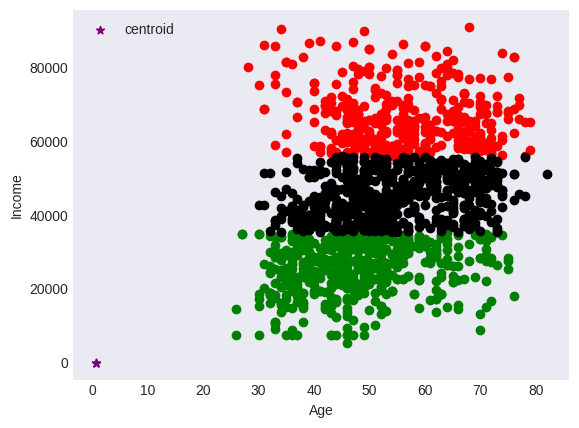

In [97]:
df1 = data[data.cluster==0]
df2 = data[data.cluster==1]
df3 = data[data.cluster==2]
plt.scatter(df1.Age,df1['Income'],color='green')
plt.scatter(df2.Age,df2['Income'],color='red')
plt.scatter(df3.Age,df3['Income'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [98]:
scaler = MinMaxScaler()

scaler.fit(data[['Income']])
data['Income'] = scaler.transform(data[['Income']])

scaler.fit(data[['Age']])
data['Age'] = scaler.transform(data[['Age']])

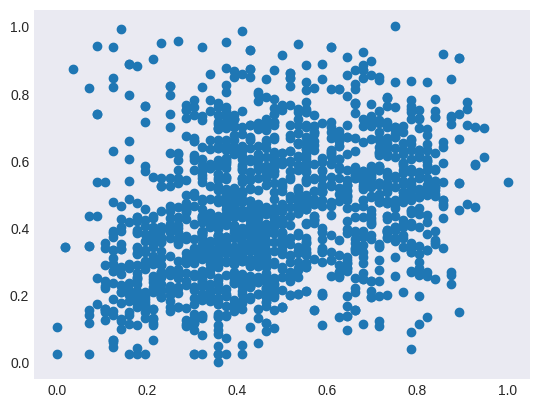

In [99]:
plt.scatter(data.Age,data['Income'])


In [100]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data[['Age','Income']])
y_predicted

array([0, 1, 2, ..., 1, 0, 0], dtype=int32)

In [101]:
data['cluster']=y_predicted
data.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Money_Spent,Children,Day_Joined,cluster
0,0,0,0.479271,38,11,1,6,2,1,6,...,1,2,5,0,0,0.750000,27,2,2,0
1,0,1,0.774373,26,426,49,127,111,21,42,...,2,10,4,0,0,0.553571,776,0,6,1
2,0,1,0.249229,26,11,4,20,10,3,5,...,0,4,6,0,0,0.214286,53,1,1,2
3,1,1,0.618816,94,173,43,118,46,27,15,...,3,6,5,0,0,0.267857,422,1,3,1
4,1,1,0.668099,16,520,42,98,0,42,14,...,4,10,6,0,0,0.517857,716,1,1,1


In [102]:
km.cluster_centers_


array([[0.71113663, 0.4921748 ],
       [0.42958031, 0.68094675],
       [0.33537147, 0.29692251]])

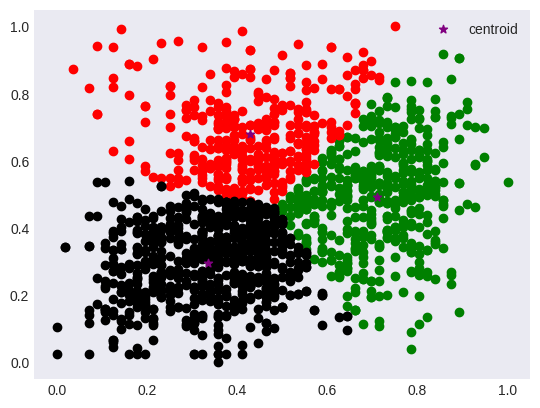

In [103]:
df1 = data[data.cluster==0]
df2 = data[data.cluster==1]
df3 = data[data.cluster==2]
plt.scatter(df1.Age,df1['Income'],color='green')
plt.scatter(df2.Age,df2['Income'],color='red')
plt.scatter(df3.Age,df3['Income'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [104]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['Age','Income']])
    sse.append(km.inertia_)

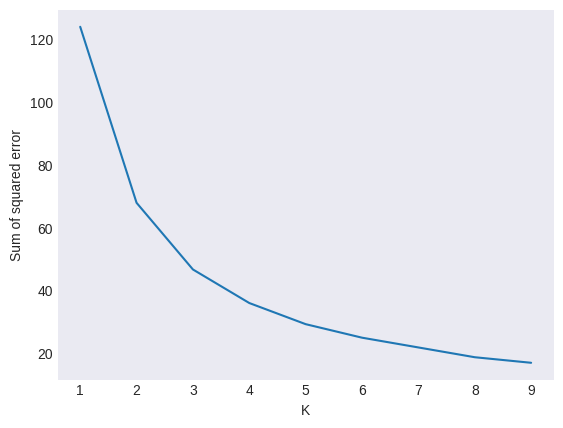

In [105]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [106]:
m1 = data.values

In [107]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(m1)

# Compute silhouette score
score = silhouette_score(m1, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.6340305977001509


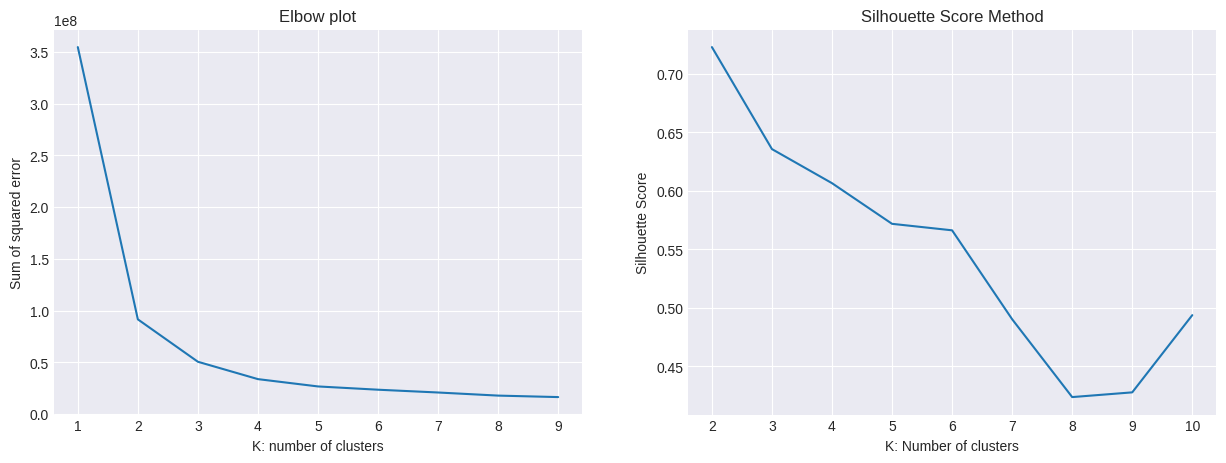

In [108]:
from sklearn.metrics import silhouette_score
sse = {}
sil = []
kmax = 10
fig = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Elbow method
plt.subplot(1, 2, 1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    kmeans.fit(m1)
    sse[k] = kmeans.inertia_

sns.lineplot(x=list(sse.keys()), y = list(sse.values()))
plt.title("Elbow plot")
plt.xlabel("K: number of clusters")
plt.ylabel('Sum of squared error')
plt.grid()

# Silhouette Score Method
plt.subplot(1, 2, 2)
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(m1)
    labels = kmeans.labels_
    sil.append(silhouette_score(m1, labels, metric = 'euclidean'))
sns.lineplot(x=range(2, kmax+1), y=sil)
plt.title("Silhouette Score Method")
plt.xlabel("K: Number of clusters")
plt.ylabel('Silhouette Score')
plt.grid()

plt.show()

In [109]:
# PCA
from sklearn.decomposition import PCA

pca = PCA()
pca_df = pd.DataFrame(pca.fit_transform(data))
pca.explained_variance_
print(len(pca.explained_variance_))

22


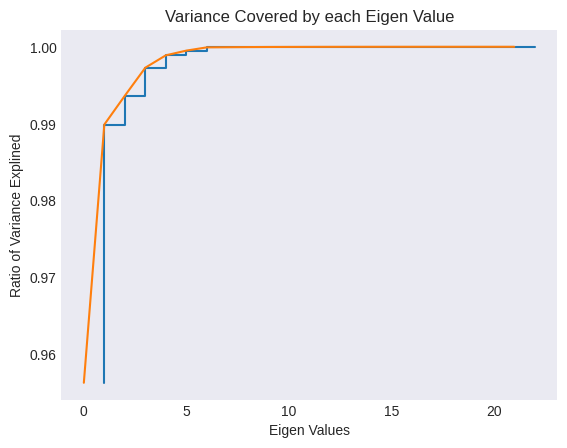

In [110]:
plt.step(list(range(1, 23)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explined')
plt.title("Variance Covered by each Eigen Value")
plt.show()

In [111]:
pca_df = pca_df.drop(columns=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
pca_df.head()

,0,1
0,-349.084278,16.482614
1,516.109524,-35.503578
2,-325.209107,-1.866719
3,84.155964,-80.761903
4,510.537259,80.358598


In [112]:
m2=pca_df.values

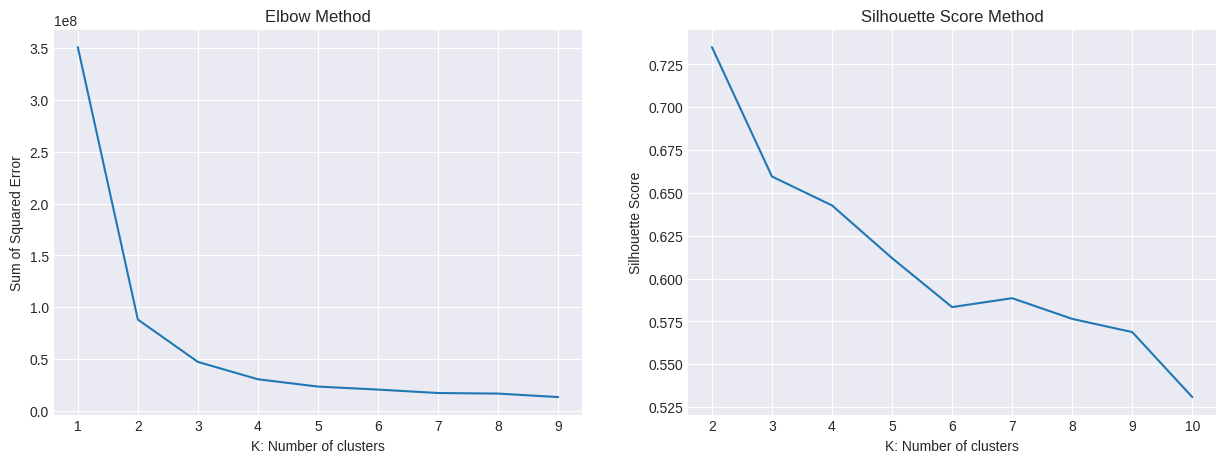

In [113]:
sse = {}; sil = []; kmax=10
fig=plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plotting elbow method
plt.subplot(1, 2, 1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    kmeans.fit(m2)
    sse[k] = kmeans.inertia_

sns.lineplot(x = list(sse.keys()), y=list(sse.values()))
plt.title('Elbow Method')
plt.xlabel("K: Number of clusters")
plt.ylabel("Sum of Squared Error")
plt.grid()

#Plotting silhouette score method
plt.subplot(1, 2, 2)
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(m2)
    labels = kmeans.labels_
    sil.append(silhouette_score(m2, labels, metric = 'euclidean'))

sns.lineplot(x=range(2, kmax+1), y=sil);
plt.title("Silhouette Score Method")
plt.xlabel("K: Number of clusters")
plt.ylabel("Silhouette Score")
plt.grid()


# DBSCAN

In [114]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
m2 = scaler.fit_transform(m2)

In [115]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

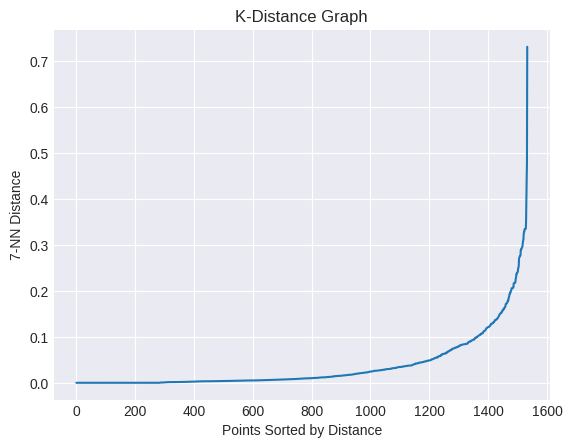

In [116]:
knn = NearestNeighbors(n_neighbors = 7)
model = knn.fit(m2)
distances, indices = knn.kneighbors(m2)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances);
plt.xlabel('Points Sorted by Distance')
plt.ylabel('7-NN Distance')
plt.title('K-Distance Graph')
plt.show()


In [117]:
db = DBSCAN(eps = 0.1, min_samples = 5).fit(m2)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Number of Clusters: ", n_clusters_)
print('Number of Outliers: ', n_noise_)
data['Class'] = labels#; df1['Class'] = labels

Number of Clusters:  15
Number of Outliers:  400


In [118]:
# Compute silhouette
# labels = db.
score = silhouette_score(m2, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.219504669001796


In [119]:
data.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Money_Spent,Children,Day_Joined,cluster,Class
0,0,0,0.479271,38,11,1,6,2,1,6,...,2,5,0,0,0.750000,27,2,2,0,0
1,0,1,0.774373,26,426,49,127,111,21,42,...,10,4,0,0,0.553571,776,0,6,1,-1
2,0,1,0.249229,26,11,4,20,10,3,5,...,4,6,0,0,0.214286,53,1,1,2,0
3,1,1,0.618816,94,173,43,118,46,27,15,...,6,5,0,0,0.267857,422,1,3,1,1
4,1,1,0.668099,16,520,42,98,0,42,14,...,10,6,0,0,0.517857,716,1,1,1,-1
